## Spectral Finance Take-Home Challenge
#### by Allen Wang

In [90]:
import requests
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [91]:
#This is the query we are going to be using to extract important borrower information including borrowing, liquidation, and repayment history
query = """{
  borrows(first: 100) {
    user{id,depositHistory {
      amount
    },borrowHistory {
      amount
    },liquidationCallHistory {collateralAmount}
    ,repayHistory{amountAfterFee}
    ,borrowedReservesCount,redeemUnderlyingHistory {
      amount
    }}
    
    
}
}"""

In [92]:
url = 'https://api.thegraph.com/subgraphs/name/aave/protocol-multy-raw'
r = requests.post(url, json={'query': query})
print(r.status_code)
print(r.text)

200
{"data":{"borrows":[{"user":{"borrowHistory":[{"amount":"500000000000000000000"},{"amount":"2800000000000000000000"},{"amount":"807886931374901115857"},{"amount":"2000000000000000000000"},{"amount":"3000000000000000000"},{"amount":"2501334870977580000000"}],"borrowedReservesCount":0,"depositHistory":[{"amount":"1845206409969912381402"},{"amount":"8000000000000000000"},{"amount":"1295000000000000000000"},{"amount":"7500000000000000000"},{"amount":"6000000000000000000"},{"amount":"6500000000000000000"},{"amount":"4000000000000000000"},{"amount":"6000000000000000000"}],"id":"0xfb5a2da7c365bfdd817bcc29a49c97b80e450f3d","liquidationCallHistory":[],"redeemUnderlyingHistory":[{"amount":"19301889670923074190"},{"amount":"200000000000000000000"},{"amount":"12700000000000000000"},{"amount":"1845206549081151390067"},{"amount":"6000000000000000000"},{"amount":"609024669051508006816"},{"amount":"500000000000000000000"}],"repayHistory":[{"amountAfterFee":"149000000000000000000"},{"amountAfterFee

In [93]:
json_data = json.loads(r.text)

In [94]:
df_data = json_data['data']['borrows']
df = pd.DataFrame(df_data)

In [95]:
#The data is not properly structured because of the complexity of the nature of the dataset. We want to parse the borrowing, repaying, and liquidation information into their respective column
df

,user
0,{'borrowHistory': [{'amount': '500000000000000...
1,"{'borrowHistory': [{'amount': '1000000000'}, {..."
2,{'borrowHistory': [{'amount': '900000000000000...
3,"{'borrowHistory': [{'amount': '80302898'}], 'b..."
4,{'borrowHistory': [{'amount': '208748722563150...
...,...
95,"{'borrowHistory': [{'amount': '400000000'}, {'..."
96,{'borrowHistory': [{'amount': '275890249184000...
97,"{'borrowHistory': [{'amount': '2000000000'}, {..."
98,{'borrowHistory': [{'amount': '360000000000000...


In [96]:
df['userid'] = 0

In [97]:
for i in range(len(df)):
    df.loc[i,'userid'] = df['user'][i]['id']

In [98]:
df['borrowHistory'] = 0

In [99]:
for i in range(len(df)):
    df['borrowHistory'][i] = df['user'][i]['borrowHistory']

C:\Users\allen\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\allen\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [100]:
df

,user,userid,borrowHistory
0,{'borrowHistory': [{'amount': '500000000000000...,0xfb5a2da7c365bfdd817bcc29a49c97b80e450f3d,"[{'amount': '500000000000000000000'}, {'amount..."
1,"{'borrowHistory': [{'amount': '1000000000'}, {...",0xecc072714365ee2fbd2e90c752c07a95641a5fe6,"[{'amount': '1000000000'}, {'amount': '1000000..."
2,{'borrowHistory': [{'amount': '900000000000000...,0x549c0421c69be943a2a60e76b19b4a801682cbd3,"[{'amount': '9000000000000000000000'}, {'amoun..."
3,"{'borrowHistory': [{'amount': '80302898'}], 'b...",0x3e20adca659b69b84591b701f6951f192943d4c3,[{'amount': '80302898'}]
4,{'borrowHistory': [{'amount': '208748722563150...,0xc4df7c5fdaed215fa559c63211407c28f91848a6,"[{'amount': '2087487225631500000000'}, {'amoun..."
...,...,...,...
95,"{'borrowHistory': [{'amount': '400000000'}, {'...",0xab292a0b800865af489fab8eb55306e3df83575f,"[{'amount': '400000000'}, {'amount': '15000000..."
96,{'borrowHistory': [{'amount': '275890249184000...,0x5104efc872d45dba3a97bf02aebe240dfc283321,"[{'amount': '2758902491840000000'}, {'amount':..."
97,"{'borrowHistory': [{'amount': '2000000000'}, {...",0xc14949d23c3620c9b08034b677dd063d27b6d3b6,"[{'amount': '2000000000'}, {'amount': '1041752..."
98,{'borrowHistory': [{'amount': '360000000000000...,0x7620fd9b67f62de89334c3ca58212c82260bc666,"[{'amount': '36000000000000000000'}, {'amount'..."


In [101]:
df['repayHistory'] = 0

In [102]:
for i in range(len(df)):
    df['repayHistory'][i] = df['user'][i]['repayHistory']

C:\Users\allen\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\allen\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [103]:
df

,user,userid,borrowHistory,repayHistory
0,{'borrowHistory': [{'amount': '500000000000000...,0xfb5a2da7c365bfdd817bcc29a49c97b80e450f3d,"[{'amount': '500000000000000000000'}, {'amount...","[{'amountAfterFee': '149000000000000000000'}, ..."
1,"{'borrowHistory': [{'amount': '1000000000'}, {...",0xecc072714365ee2fbd2e90c752c07a95641a5fe6,"[{'amount': '1000000000'}, {'amount': '1000000...","[{'amountAfterFee': '1070128726498644302479'},..."
2,{'borrowHistory': [{'amount': '900000000000000...,0x549c0421c69be943a2a60e76b19b4a801682cbd3,"[{'amount': '9000000000000000000000'}, {'amoun...",[{'amountAfterFee': '99894544142134942596615'}...
3,"{'borrowHistory': [{'amount': '80302898'}], 'b...",0x3e20adca659b69b84591b701f6951f192943d4c3,[{'amount': '80302898'}],[{'amountAfterFee': '80976429'}]
4,{'borrowHistory': [{'amount': '208748722563150...,0xc4df7c5fdaed215fa559c63211407c28f91848a6,"[{'amount': '2087487225631500000000'}, {'amoun...","[{'amountAfterFee': '3721250430594437767510'},..."
...,...,...,...,...
95,"{'borrowHistory': [{'amount': '400000000'}, {'...",0xab292a0b800865af489fab8eb55306e3df83575f,"[{'amount': '400000000'}, {'amount': '15000000...","[{'amountAfterFee': '2484337807'}, {'amountAft..."
96,{'borrowHistory': [{'amount': '275890249184000...,0x5104efc872d45dba3a97bf02aebe240dfc283321,"[{'amount': '2758902491840000000'}, {'amount':...","[{'amountAfterFee': '1319374971'}, {'amountAft..."
97,"{'borrowHistory': [{'amount': '2000000000'}, {...",0xc14949d23c3620c9b08034b677dd063d27b6d3b6,"[{'amount': '2000000000'}, {'amount': '1041752...","[{'amountAfterFee': '661391158'}, {'amountAfte..."
98,{'borrowHistory': [{'amount': '360000000000000...,0x7620fd9b67f62de89334c3ca58212c82260bc666,"[{'amount': '36000000000000000000'}, {'amount'...","[{'amountAfterFee': '689999928128040747108'}, ..."


In [104]:
df['redeemUnderlyingHistory'] = 0

In [105]:
for i in range(len(df)):
    df['redeemUnderlyingHistory'][i] = df['user'][i]['redeemUnderlyingHistory']

C:\Users\allen\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\allen\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [106]:
df

,user,userid,borrowHistory,repayHistory,redeemUnderlyingHistory
0,{'borrowHistory': [{'amount': '500000000000000...,0xfb5a2da7c365bfdd817bcc29a49c97b80e450f3d,"[{'amount': '500000000000000000000'}, {'amount...","[{'amountAfterFee': '149000000000000000000'}, ...","[{'amount': '19301889670923074190'}, {'amount'..."
1,"{'borrowHistory': [{'amount': '1000000000'}, {...",0xecc072714365ee2fbd2e90c752c07a95641a5fe6,"[{'amount': '1000000000'}, {'amount': '1000000...","[{'amountAfterFee': '1070128726498644302479'},...",[{'amount': '3737540492877383753'}]
2,{'borrowHistory': [{'amount': '900000000000000...,0x549c0421c69be943a2a60e76b19b4a801682cbd3,"[{'amount': '9000000000000000000000'}, {'amoun...",[{'amountAfterFee': '99894544142134942596615'}...,"[{'amount': '89022134022'}, {'amount': '400000..."
3,"{'borrowHistory': [{'amount': '80302898'}], 'b...",0x3e20adca659b69b84591b701f6951f192943d4c3,[{'amount': '80302898'}],[{'amountAfterFee': '80976429'}],[{'amount': '400747819403090180'}]
4,{'borrowHistory': [{'amount': '208748722563150...,0xc4df7c5fdaed215fa559c63211407c28f91848a6,"[{'amount': '2087487225631500000000'}, {'amoun...","[{'amountAfterFee': '3721250430594437767510'},...","[{'amount': '100373422'}, {'amount': '10020000..."
...,...,...,...,...,...
95,"{'borrowHistory': [{'amount': '400000000'}, {'...",0xab292a0b800865af489fab8eb55306e3df83575f,"[{'amount': '400000000'}, {'amount': '15000000...","[{'amountAfterFee': '2484337807'}, {'amountAft...","[{'amount': '100024286733475779090150'}, {'amo..."
96,{'borrowHistory': [{'amount': '275890249184000...,0x5104efc872d45dba3a97bf02aebe240dfc283321,"[{'amount': '2758902491840000000'}, {'amount':...","[{'amountAfterFee': '1319374971'}, {'amountAft...","[{'amount': '25000000000000000000000'}, {'amou..."
97,"{'borrowHistory': [{'amount': '2000000000'}, {...",0xc14949d23c3620c9b08034b677dd063d27b6d3b6,"[{'amount': '2000000000'}, {'amount': '1041752...","[{'amountAfterFee': '661391158'}, {'amountAfte...","[{'amount': '172255742723094470085'}, {'amount..."
98,{'borrowHistory': [{'amount': '360000000000000...,0x7620fd9b67f62de89334c3ca58212c82260bc666,"[{'amount': '36000000000000000000'}, {'amount'...","[{'amountAfterFee': '689999928128040747108'}, ...","[{'amount': '1500000028507073985'}, {'amount':..."


In [107]:
df['liquidationCallHistory'] = '0'

In [108]:
for i in range(len(df)):
    if np.array(df['user'][i]['liquidationCallHistory']).size > 0:
        df['liquidationCallHistory'][i] = df['user'][i]['liquidationCallHistory']

In [109]:
df

,user,userid,borrowHistory,repayHistory,redeemUnderlyingHistory,liquidationCallHistory
0,{'borrowHistory': [{'amount': '500000000000000...,0xfb5a2da7c365bfdd817bcc29a49c97b80e450f3d,"[{'amount': '500000000000000000000'}, {'amount...","[{'amountAfterFee': '149000000000000000000'}, ...","[{'amount': '19301889670923074190'}, {'amount'...",0
1,"{'borrowHistory': [{'amount': '1000000000'}, {...",0xecc072714365ee2fbd2e90c752c07a95641a5fe6,"[{'amount': '1000000000'}, {'amount': '1000000...","[{'amountAfterFee': '1070128726498644302479'},...",[{'amount': '3737540492877383753'}],[{'collateralAmount': '547024554576355662089'}...
2,{'borrowHistory': [{'amount': '900000000000000...,0x549c0421c69be943a2a60e76b19b4a801682cbd3,"[{'amount': '9000000000000000000000'}, {'amoun...",[{'amountAfterFee': '99894544142134942596615'}...,"[{'amount': '89022134022'}, {'amount': '400000...",0
3,"{'borrowHistory': [{'amount': '80302898'}], 'b...",0x3e20adca659b69b84591b701f6951f192943d4c3,[{'amount': '80302898'}],[{'amountAfterFee': '80976429'}],[{'amount': '400747819403090180'}],0
4,{'borrowHistory': [{'amount': '208748722563150...,0xc4df7c5fdaed215fa559c63211407c28f91848a6,"[{'amount': '2087487225631500000000'}, {'amoun...","[{'amountAfterFee': '3721250430594437767510'},...","[{'amount': '100373422'}, {'amount': '10020000...",0
...,...,...,...,...,...,...
95,"{'borrowHistory': [{'amount': '400000000'}, {'...",0xab292a0b800865af489fab8eb55306e3df83575f,"[{'amount': '400000000'}, {'amount': '15000000...","[{'amountAfterFee': '2484337807'}, {'amountAft...","[{'amount': '100024286733475779090150'}, {'amo...",0
96,{'borrowHistory': [{'amount': '275890249184000...,0x5104efc872d45dba3a97bf02aebe240dfc283321,"[{'amount': '2758902491840000000'}, {'amount':...","[{'amountAfterFee': '1319374971'}, {'amountAft...","[{'amount': '25000000000000000000000'}, {'amou...",[{'collateralAmount': '1636628455949431080364'...
97,"{'borrowHistory': [{'amount': '2000000000'}, {...",0xc14949d23c3620c9b08034b677dd063d27b6d3b6,"[{'amount': '2000000000'}, {'amount': '1041752...","[{'amountAfterFee': '661391158'}, {'amountAfte...","[{'amount': '172255742723094470085'}, {'amount...",0
98,{'borrowHistory': [{'amount': '360000000000000...,0x7620fd9b67f62de89334c3ca58212c82260bc666,"[{'amount': '36000000000000000000'}, {'amount'...","[{'amountAfterFee': '689999928128040747108'}, ...","[{'amount': '1500000028507073985'}, {'amount':...",0


I am creating count columns for the number of borrows, repayments, and liquidations that a user has encountered. This may be useful information for the credit scoring metric.

In [110]:
df['borrowCount'] = 0

In [111]:
for i in range(len(df)):
    df.loc[i,'borrowCount'] = len(df['borrowHistory'][i])

In [112]:
df

,user,userid,borrowHistory,repayHistory,redeemUnderlyingHistory,liquidationCallHistory,borrowCount
0,{'borrowHistory': [{'amount': '500000000000000...,0xfb5a2da7c365bfdd817bcc29a49c97b80e450f3d,"[{'amount': '500000000000000000000'}, {'amount...","[{'amountAfterFee': '149000000000000000000'}, ...","[{'amount': '19301889670923074190'}, {'amount'...",0,6
1,"{'borrowHistory': [{'amount': '1000000000'}, {...",0xecc072714365ee2fbd2e90c752c07a95641a5fe6,"[{'amount': '1000000000'}, {'amount': '1000000...","[{'amountAfterFee': '1070128726498644302479'},...",[{'amount': '3737540492877383753'}],[{'collateralAmount': '547024554576355662089'}...,7
2,{'borrowHistory': [{'amount': '900000000000000...,0x549c0421c69be943a2a60e76b19b4a801682cbd3,"[{'amount': '9000000000000000000000'}, {'amoun...",[{'amountAfterFee': '99894544142134942596615'}...,"[{'amount': '89022134022'}, {'amount': '400000...",0,73
3,"{'borrowHistory': [{'amount': '80302898'}], 'b...",0x3e20adca659b69b84591b701f6951f192943d4c3,[{'amount': '80302898'}],[{'amountAfterFee': '80976429'}],[{'amount': '400747819403090180'}],0,1
4,{'borrowHistory': [{'amount': '208748722563150...,0xc4df7c5fdaed215fa559c63211407c28f91848a6,"[{'amount': '2087487225631500000000'}, {'amoun...","[{'amountAfterFee': '3721250430594437767510'},...","[{'amount': '100373422'}, {'amount': '10020000...",0,4
...,...,...,...,...,...,...,...
95,"{'borrowHistory': [{'amount': '400000000'}, {'...",0xab292a0b800865af489fab8eb55306e3df83575f,"[{'amount': '400000000'}, {'amount': '15000000...","[{'amountAfterFee': '2484337807'}, {'amountAft...","[{'amount': '100024286733475779090150'}, {'amo...",0,13
96,{'borrowHistory': [{'amount': '275890249184000...,0x5104efc872d45dba3a97bf02aebe240dfc283321,"[{'amount': '2758902491840000000'}, {'amount':...","[{'amountAfterFee': '1319374971'}, {'amountAft...","[{'amount': '25000000000000000000000'}, {'amou...",[{'collateralAmount': '1636628455949431080364'...,100
97,"{'borrowHistory': [{'amount': '2000000000'}, {...",0xc14949d23c3620c9b08034b677dd063d27b6d3b6,"[{'amount': '2000000000'}, {'amount': '1041752...","[{'amountAfterFee': '661391158'}, {'amountAfte...","[{'amount': '172255742723094470085'}, {'amount...",0,21
98,{'borrowHistory': [{'amount': '360000000000000...,0x7620fd9b67f62de89334c3ca58212c82260bc666,"[{'amount': '36000000000000000000'}, {'amount'...","[{'amountAfterFee': '689999928128040747108'}, ...","[{'amount': '1500000028507073985'}, {'amount':...",0,33


In [113]:
df['repayCount'] = 0

In [114]:
for i in range(len(df)):
    df.loc[i,'repayCount'] = len(df['repayHistory'][i])

In [115]:
df

,user,userid,borrowHistory,repayHistory,redeemUnderlyingHistory,liquidationCallHistory,borrowCount,repayCount
0,{'borrowHistory': [{'amount': '500000000000000...,0xfb5a2da7c365bfdd817bcc29a49c97b80e450f3d,"[{'amount': '500000000000000000000'}, {'amount...","[{'amountAfterFee': '149000000000000000000'}, ...","[{'amount': '19301889670923074190'}, {'amount'...",0,6,7
1,"{'borrowHistory': [{'amount': '1000000000'}, {...",0xecc072714365ee2fbd2e90c752c07a95641a5fe6,"[{'amount': '1000000000'}, {'amount': '1000000...","[{'amountAfterFee': '1070128726498644302479'},...",[{'amount': '3737540492877383753'}],[{'collateralAmount': '547024554576355662089'}...,7,3
2,{'borrowHistory': [{'amount': '900000000000000...,0x549c0421c69be943a2a60e76b19b4a801682cbd3,"[{'amount': '9000000000000000000000'}, {'amoun...",[{'amountAfterFee': '99894544142134942596615'}...,"[{'amount': '89022134022'}, {'amount': '400000...",0,73,43
3,"{'borrowHistory': [{'amount': '80302898'}], 'b...",0x3e20adca659b69b84591b701f6951f192943d4c3,[{'amount': '80302898'}],[{'amountAfterFee': '80976429'}],[{'amount': '400747819403090180'}],0,1,1
4,{'borrowHistory': [{'amount': '208748722563150...,0xc4df7c5fdaed215fa559c63211407c28f91848a6,"[{'amount': '2087487225631500000000'}, {'amoun...","[{'amountAfterFee': '3721250430594437767510'},...","[{'amount': '100373422'}, {'amount': '10020000...",0,4,4
...,...,...,...,...,...,...,...,...
95,"{'borrowHistory': [{'amount': '400000000'}, {'...",0xab292a0b800865af489fab8eb55306e3df83575f,"[{'amount': '400000000'}, {'amount': '15000000...","[{'amountAfterFee': '2484337807'}, {'amountAft...","[{'amount': '100024286733475779090150'}, {'amo...",0,13,11
96,{'borrowHistory': [{'amount': '275890249184000...,0x5104efc872d45dba3a97bf02aebe240dfc283321,"[{'amount': '2758902491840000000'}, {'amount':...","[{'amountAfterFee': '1319374971'}, {'amountAft...","[{'amount': '25000000000000000000000'}, {'amou...",[{'collateralAmount': '1636628455949431080364'...,100,100
97,"{'borrowHistory': [{'amount': '2000000000'}, {...",0xc14949d23c3620c9b08034b677dd063d27b6d3b6,"[{'amount': '2000000000'}, {'amount': '1041752...","[{'amountAfterFee': '661391158'}, {'amountAfte...","[{'amount': '172255742723094470085'}, {'amount...",0,21,10
98,{'borrowHistory': [{'amount': '360000000000000...,0x7620fd9b67f62de89334c3ca58212c82260bc666,"[{'amount': '36000000000000000000'}, {'amount'...","[{'amountAfterFee': '689999928128040747108'}, ...","[{'amount': '1500000028507073985'}, {'amount':...",0,33,25


In [117]:
df['redeemCount'] = 0 

In [119]:
for i in range(len(df)):
    df.loc[i,'redeemCount'] = len(df['redeemUnderlyingHistory'][i])

In [120]:
df

,user,userid,borrowHistory,repayHistory,redeemUnderlyingHistory,liquidationCallHistory,borrowCount,repayCount,liquidationCount,redeemCount
0,{'borrowHistory': [{'amount': '500000000000000...,0xfb5a2da7c365bfdd817bcc29a49c97b80e450f3d,"[{'amount': '500000000000000000000'}, {'amount...","[{'amountAfterFee': '149000000000000000000'}, ...","[{'amount': '19301889670923074190'}, {'amount'...",0,6,7,0,7
1,"{'borrowHistory': [{'amount': '1000000000'}, {...",0xecc072714365ee2fbd2e90c752c07a95641a5fe6,"[{'amount': '1000000000'}, {'amount': '1000000...","[{'amountAfterFee': '1070128726498644302479'},...",[{'amount': '3737540492877383753'}],[{'collateralAmount': '547024554576355662089'}...,7,3,0,1
2,{'borrowHistory': [{'amount': '900000000000000...,0x549c0421c69be943a2a60e76b19b4a801682cbd3,"[{'amount': '9000000000000000000000'}, {'amoun...",[{'amountAfterFee': '99894544142134942596615'}...,"[{'amount': '89022134022'}, {'amount': '400000...",0,73,43,0,71
3,"{'borrowHistory': [{'amount': '80302898'}], 'b...",0x3e20adca659b69b84591b701f6951f192943d4c3,[{'amount': '80302898'}],[{'amountAfterFee': '80976429'}],[{'amount': '400747819403090180'}],0,1,1,0,1
4,{'borrowHistory': [{'amount': '208748722563150...,0xc4df7c5fdaed215fa559c63211407c28f91848a6,"[{'amount': '2087487225631500000000'}, {'amoun...","[{'amountAfterFee': '3721250430594437767510'},...","[{'amount': '100373422'}, {'amount': '10020000...",0,4,4,0,6
...,...,...,...,...,...,...,...,...,...,...
95,"{'borrowHistory': [{'amount': '400000000'}, {'...",0xab292a0b800865af489fab8eb55306e3df83575f,"[{'amount': '400000000'}, {'amount': '15000000...","[{'amountAfterFee': '2484337807'}, {'amountAft...","[{'amount': '100024286733475779090150'}, {'amo...",0,13,11,0,4
96,{'borrowHistory': [{'amount': '275890249184000...,0x5104efc872d45dba3a97bf02aebe240dfc283321,"[{'amount': '2758902491840000000'}, {'amount':...","[{'amountAfterFee': '1319374971'}, {'amountAft...","[{'amount': '25000000000000000000000'}, {'amou...",[{'collateralAmount': '1636628455949431080364'...,100,100,0,100
97,"{'borrowHistory': [{'amount': '2000000000'}, {...",0xc14949d23c3620c9b08034b677dd063d27b6d3b6,"[{'amount': '2000000000'}, {'amount': '1041752...","[{'amountAfterFee': '661391158'}, {'amountAfte...","[{'amount': '172255742723094470085'}, {'amount...",0,21,10,0,30
98,{'borrowHistory': [{'amount': '360000000000000...,0x7620fd9b67f62de89334c3ca58212c82260bc666,"[{'amount': '36000000000000000000'}, {'amount'...","[{'amountAfterFee': '689999928128040747108'}, ...","[{'amount': '1500000028507073985'}, {'amount':...",0,33,25,0,19


In [121]:
df['liquidationCount'] = 0

In [122]:
for i in range(len(df)):
    if df['liquidationCallHistory'][i] != '0':
        df.loc[i,'liquidationCount'] = len(df['liquidationCallHistory'][i])

In [123]:
df

,user,userid,borrowHistory,repayHistory,redeemUnderlyingHistory,liquidationCallHistory,borrowCount,repayCount,liquidationCount,redeemCount
0,{'borrowHistory': [{'amount': '500000000000000...,0xfb5a2da7c365bfdd817bcc29a49c97b80e450f3d,"[{'amount': '500000000000000000000'}, {'amount...","[{'amountAfterFee': '149000000000000000000'}, ...","[{'amount': '19301889670923074190'}, {'amount'...",0,6,7,0,7
1,"{'borrowHistory': [{'amount': '1000000000'}, {...",0xecc072714365ee2fbd2e90c752c07a95641a5fe6,"[{'amount': '1000000000'}, {'amount': '1000000...","[{'amountAfterFee': '1070128726498644302479'},...",[{'amount': '3737540492877383753'}],[{'collateralAmount': '547024554576355662089'}...,7,3,3,1
2,{'borrowHistory': [{'amount': '900000000000000...,0x549c0421c69be943a2a60e76b19b4a801682cbd3,"[{'amount': '9000000000000000000000'}, {'amoun...",[{'amountAfterFee': '99894544142134942596615'}...,"[{'amount': '89022134022'}, {'amount': '400000...",0,73,43,0,71
3,"{'borrowHistory': [{'amount': '80302898'}], 'b...",0x3e20adca659b69b84591b701f6951f192943d4c3,[{'amount': '80302898'}],[{'amountAfterFee': '80976429'}],[{'amount': '400747819403090180'}],0,1,1,0,1
4,{'borrowHistory': [{'amount': '208748722563150...,0xc4df7c5fdaed215fa559c63211407c28f91848a6,"[{'amount': '2087487225631500000000'}, {'amoun...","[{'amountAfterFee': '3721250430594437767510'},...","[{'amount': '100373422'}, {'amount': '10020000...",0,4,4,0,6
...,...,...,...,...,...,...,...,...,...,...
95,"{'borrowHistory': [{'amount': '400000000'}, {'...",0xab292a0b800865af489fab8eb55306e3df83575f,"[{'amount': '400000000'}, {'amount': '15000000...","[{'amountAfterFee': '2484337807'}, {'amountAft...","[{'amount': '100024286733475779090150'}, {'amo...",0,13,11,0,4
96,{'borrowHistory': [{'amount': '275890249184000...,0x5104efc872d45dba3a97bf02aebe240dfc283321,"[{'amount': '2758902491840000000'}, {'amount':...","[{'amountAfterFee': '1319374971'}, {'amountAft...","[{'amount': '25000000000000000000000'}, {'amou...",[{'collateralAmount': '1636628455949431080364'...,100,100,2,100
97,"{'borrowHistory': [{'amount': '2000000000'}, {...",0xc14949d23c3620c9b08034b677dd063d27b6d3b6,"[{'amount': '2000000000'}, {'amount': '1041752...","[{'amountAfterFee': '661391158'}, {'amountAfte...","[{'amount': '172255742723094470085'}, {'amount...",0,21,10,0,30
98,{'borrowHistory': [{'amount': '360000000000000...,0x7620fd9b67f62de89334c3ca58212c82260bc666,"[{'amount': '36000000000000000000'}, {'amount'...","[{'amountAfterFee': '689999928128040747108'}, ...","[{'amount': '1500000028507073985'}, {'amount':...",0,33,25,0,19


In [124]:
df['borrowedReservesCount'] = 0

In [125]:
for i in range(len(df)):
    df['borrowedReservesCount'][i] = df['user'][i]['borrowedReservesCount']

C:\Users\allen\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [126]:
df

,user,userid,borrowHistory,repayHistory,redeemUnderlyingHistory,liquidationCallHistory,borrowCount,repayCount,liquidationCount,redeemCount,borrowedReservesCount
0,{'borrowHistory': [{'amount': '500000000000000...,0xfb5a2da7c365bfdd817bcc29a49c97b80e450f3d,"[{'amount': '500000000000000000000'}, {'amount...","[{'amountAfterFee': '149000000000000000000'}, ...","[{'amount': '19301889670923074190'}, {'amount'...",0,6,7,0,7,0
1,"{'borrowHistory': [{'amount': '1000000000'}, {...",0xecc072714365ee2fbd2e90c752c07a95641a5fe6,"[{'amount': '1000000000'}, {'amount': '1000000...","[{'amountAfterFee': '1070128726498644302479'},...",[{'amount': '3737540492877383753'}],[{'collateralAmount': '547024554576355662089'}...,7,3,3,1,0
2,{'borrowHistory': [{'amount': '900000000000000...,0x549c0421c69be943a2a60e76b19b4a801682cbd3,"[{'amount': '9000000000000000000000'}, {'amoun...",[{'amountAfterFee': '99894544142134942596615'}...,"[{'amount': '89022134022'}, {'amount': '400000...",0,73,43,0,71,1
3,"{'borrowHistory': [{'amount': '80302898'}], 'b...",0x3e20adca659b69b84591b701f6951f192943d4c3,[{'amount': '80302898'}],[{'amountAfterFee': '80976429'}],[{'amount': '400747819403090180'}],0,1,1,0,1,0
4,{'borrowHistory': [{'amount': '208748722563150...,0xc4df7c5fdaed215fa559c63211407c28f91848a6,"[{'amount': '2087487225631500000000'}, {'amoun...","[{'amountAfterFee': '3721250430594437767510'},...","[{'amount': '100373422'}, {'amount': '10020000...",0,4,4,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...
95,"{'borrowHistory': [{'amount': '400000000'}, {'...",0xab292a0b800865af489fab8eb55306e3df83575f,"[{'amount': '400000000'}, {'amount': '15000000...","[{'amountAfterFee': '2484337807'}, {'amountAft...","[{'amount': '100024286733475779090150'}, {'amo...",0,13,11,0,4,0
96,{'borrowHistory': [{'amount': '275890249184000...,0x5104efc872d45dba3a97bf02aebe240dfc283321,"[{'amount': '2758902491840000000'}, {'amount':...","[{'amountAfterFee': '1319374971'}, {'amountAft...","[{'amount': '25000000000000000000000'}, {'amou...",[{'collateralAmount': '1636628455949431080364'...,100,100,2,100,3
97,"{'borrowHistory': [{'amount': '2000000000'}, {...",0xc14949d23c3620c9b08034b677dd063d27b6d3b6,"[{'amount': '2000000000'}, {'amount': '1041752...","[{'amountAfterFee': '661391158'}, {'amountAfte...","[{'amount': '172255742723094470085'}, {'amount...",0,21,10,0,30,0
98,{'borrowHistory': [{'amount': '360000000000000...,0x7620fd9b67f62de89334c3ca58212c82260bc666,"[{'amount': '36000000000000000000'}, {'amount'...","[{'amountAfterFee': '689999928128040747108'}, ...","[{'amount': '1500000028507073985'}, {'amount':...",0,33,25,0,19,0


In [168]:
df['liquidationstatus'] = 0

In [169]:
for i in range(len(df)):
    if df['liquidationCount'][i] != 0:
        df['liquidationstatus'][i] = 1

C:\Users\allen\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [170]:
df

,user,userid,borrowHistory,repayHistory,redeemUnderlyingHistory,liquidationCallHistory,borrowCount,repayCount,liquidationCount,redeemCount,borrowedReservesCount,creditscore,liquidationstatus
0,{'borrowHistory': [{'amount': '500000000000000...,0xfb5a2da7c365bfdd817bcc29a49c97b80e450f3d,"[{'amount': '500000000000000000000'}, {'amount...","[{'amountAfterFee': '149000000000000000000'}, ...","[{'amount': '19301889670923074190'}, {'amount'...",0,6,7,0,7,0,762.541972,0
1,"{'borrowHistory': [{'amount': '1000000000'}, {...",0xecc072714365ee2fbd2e90c752c07a95641a5fe6,"[{'amount': '1000000000'}, {'amount': '1000000...","[{'amountAfterFee': '1070128726498644302479'},...",[{'amount': '3737540492877383753'}],[{'collateralAmount': '547024554576355662089'}...,7,3,3,1,0,500.000000,1
2,{'borrowHistory': [{'amount': '900000000000000...,0x549c0421c69be943a2a60e76b19b4a801682cbd3,"[{'amount': '9000000000000000000000'}, {'amoun...",[{'amountAfterFee': '99894544142134942596615'}...,"[{'amount': '89022134022'}, {'amount': '400000...",0,73,43,0,71,1,643.145098,0
3,"{'borrowHistory': [{'amount': '80302898'}], 'b...",0x3e20adca659b69b84591b701f6951f192943d4c3,[{'amount': '80302898'}],[{'amountAfterFee': '80976429'}],[{'amount': '400747819403090180'}],0,1,1,0,1,0,731.058579,0
4,{'borrowHistory': [{'amount': '208748722563150...,0xc4df7c5fdaed215fa559c63211407c28f91848a6,"[{'amount': '2087487225631500000000'}, {'amoun...","[{'amountAfterFee': '3721250430594437767510'},...","[{'amount': '100373422'}, {'amount': '10020000...",0,4,4,0,6,0,731.058579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,"{'borrowHistory': [{'amount': '400000000'}, {'...",0xab292a0b800865af489fab8eb55306e3df83575f,"[{'amount': '400000000'}, {'amount': '15000000...","[{'amountAfterFee': '2484337807'}, {'amountAft...","[{'amount': '100024286733475779090150'}, {'amo...",0,13,11,0,4,0,699.759702,0
96,{'borrowHistory': [{'amount': '275890249184000...,0x5104efc872d45dba3a97bf02aebe240dfc283321,"[{'amount': '2758902491840000000'}, {'amount':...","[{'amountAfterFee': '1319374971'}, {'amountAft...","[{'amount': '25000000000000000000000'}, {'amou...",[{'collateralAmount': '1636628455949431080364'...,100,100,2,100,3,727.108216,1
97,"{'borrowHistory': [{'amount': '2000000000'}, {...",0xc14949d23c3620c9b08034b677dd063d27b6d3b6,"[{'amount': '2000000000'}, {'amount': '1041752...","[{'amountAfterFee': '661391158'}, {'amountAfte...","[{'amount': '172255742723094470085'}, {'amount...",0,21,10,0,30,0,616.847909,0
98,{'borrowHistory': [{'amount': '360000000000000...,0x7620fd9b67f62de89334c3ca58212c82260bc666,"[{'amount': '36000000000000000000'}, {'amount'...","[{'amountAfterFee': '689999928128040747108'}, ...","[{'amount': '1500000028507073985'}, {'amount':...",0,33,25,0,19,0,680.827173,0


In [171]:
corr = df.corr()

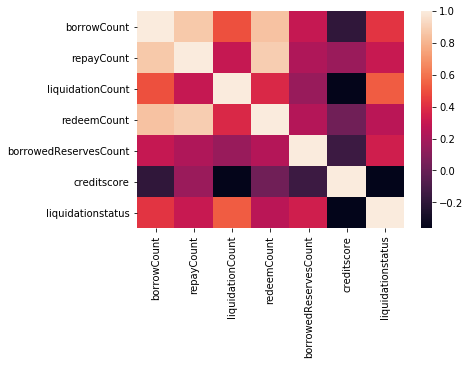

In [172]:
sns.heatmap(corr)

I created a scoring metric that is modelled off the structure of a sigmoid function. The purpose of this is to constrain the score between 0 and 1. However we want to scale it up three decimal places to model the scale and structure of a credit score or Spectral's MACRO score. The structure of a sigmoid function is 1/(1+e^-x) where x has the ability of any number on a small or large scale. X is going to take into account the three metrics that we extracted from AAVE's API which is a user's borrowCount, repayCount, and liquidationCount. In an ideal world, borrowCount is exactly equal to repayCount which a borrower pays back all of his loans leading to an equation of 1/(1+e^-1) which is around 0.73. Similar to credit score, a good score lies around 0.7 * 1000 which is 700. In terms of the real world, the scalability is similar to our current standards of credit score and FICO score. In unique cases where the repayCount is higher than borrowCount, the credit score will go above 730 to 800, and in extreme cases and outliers it will go above that. It seems that in most of these entries the repayCount is lower than the borrowCount which makes sense. The x in the case of the sigmoid function can be modelled by a ratio of repayCount to borrowCount. 

Taking into account liquidationCounts, liquidations should penalize whatever score that we had derived from the sigmoid function. We can't subtract a flat number or a large chunk of the score per liquidation because that would be too punishing. Instead, we penalize the score per liquidationCount in respect to the number of borrowCounts. This can be an addition into the x variable of the sigmoid function. The new formula is modelled by 1000/(1+e^((-repayCount+liquidationCount)/borrowCount)). In this model, if there are more liquidationCount than repayCount, then the score is going to be severely punishing as the score dips below 500 just as e's power becomes positive.

${creditscore} = \Large\frac {1}{1+e^\frac{-repayCount+liquidationCount}{borrowCount}} $

In [173]:
df['creditscore'] = 0

In [174]:
for i in range(len(df)):
    df.loc[i,'creditscore'] = 1000/(1+np.exp((-df.repayCount[i]+df.liquidationCount[i])/df.borrowCount[i]))

In [175]:
df.head()

,user,userid,borrowHistory,repayHistory,redeemUnderlyingHistory,liquidationCallHistory,borrowCount,repayCount,liquidationCount,redeemCount,borrowedReservesCount,creditscore,liquidationstatus
0,{'borrowHistory': [{'amount': '500000000000000...,0xfb5a2da7c365bfdd817bcc29a49c97b80e450f3d,"[{'amount': '500000000000000000000'}, {'amount...","[{'amountAfterFee': '149000000000000000000'}, ...","[{'amount': '19301889670923074190'}, {'amount'...",0,6,7,0,7,0,762.541972,0
1,"{'borrowHistory': [{'amount': '1000000000'}, {...",0xecc072714365ee2fbd2e90c752c07a95641a5fe6,"[{'amount': '1000000000'}, {'amount': '1000000...","[{'amountAfterFee': '1070128726498644302479'},...",[{'amount': '3737540492877383753'}],[{'collateralAmount': '547024554576355662089'}...,7,3,3,1,0,500.000000,1
2,{'borrowHistory': [{'amount': '900000000000000...,0x549c0421c69be943a2a60e76b19b4a801682cbd3,"[{'amount': '9000000000000000000000'}, {'amoun...",[{'amountAfterFee': '99894544142134942596615'}...,"[{'amount': '89022134022'}, {'amount': '400000...",0,73,43,0,71,1,643.145098,0
3,"{'borrowHistory': [{'amount': '80302898'}], 'b...",0x3e20adca659b69b84591b701f6951f192943d4c3,[{'amount': '80302898'}],[{'amountAfterFee': '80976429'}],[{'amount': '400747819403090180'}],0,1,1,0,1,0,731.058579,0
4,{'borrowHistory': [{'amount': '208748722563150...,0xc4df7c5fdaed215fa559c63211407c28f91848a6,"[{'amount': '2087487225631500000000'}, {'amoun...","[{'amountAfterFee': '3721250430594437767510'},...","[{'amount': '100373422'}, {'amount': '10020000...",0,4,4,0,6,0,731.058579,0


In [176]:
df.creditscore.unique()

array([762.54197166, 500.        , 643.14509833, 731.05857863,
       670.03278287, 758.20382759, 740.77489918, 536.96944503,
       707.30957093, 783.42090423, 549.83399731, 802.18388856,
       982.01379004, 719.33723773, 689.24889694, 671.94189569,
       710.94950263, 753.55200924, 610.63923395, 705.78502784,
       486.11468225, 594.98579352, 810.69699831, 584.19052294,
       622.4593312 , 625.06690871, 743.96249132, 582.57020646,
       702.66065434, 547.47559513, 658.6182792 , 670.32987736,
       676.99585624, 717.28511248, 702.06336988, 544.52460417,
       647.64320532, 575.18313194, 785.83498304, 657.50018166,
       689.97448113, 639.09274516, 513.15485821, 641.06740633,
       609.31754184, 685.94945501, 535.65367083, 679.17869918,
       524.97918748, 880.79707798, 552.43804487, 712.38111293,
       631.45445985, 420.67574785, 697.05928397, 736.71916799,
       645.65630623, 660.75636877, 670.86970061, 619.95605415,
       791.39147267, 526.01814468, 472.25076495, 692.64

The scoring formula can definitely take into account other covariates and can be further improved with additional metrics. Since this is a very underdeveloped prototype of a credit scoring method, it only takes three variables. If we had blockchain data with already existing scores from a previous scoring metric but no knowledge of the scoring metrics, we could model and predict these continuous scores using machine learning specifically linear regression. However since we are creating an entirely new scoring metric, we are going off of heuristics. We can use off-chain data to improve the model by scanning for outliers in calculating the credit score using this given formula. There we would perform root-cause-analysis in order to determine what is causing the outliers and extremities (e.g. if we have multiple scores that are way below 500 or above 900) and to adjust our model accordingly.

In [177]:
corr = df.corr()

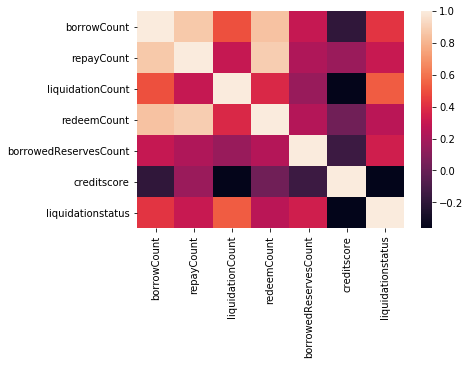

In [178]:
sns.heatmap(corr)

(array([39., 16.,  8.,  7.,  7.,  5.,  2.,  3.,  1., 12.]),
 array([  1. ,  10.9,  20.8,  30.7,  40.6,  50.5,  60.4,  70.3,  80.2,
         90.1, 100. ]),
 <a list of 10 Patch objects>)

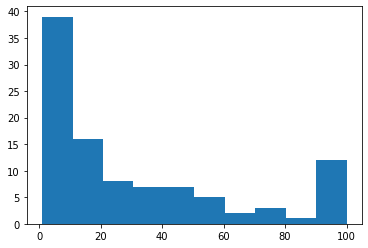

In [179]:
plt.hist(x = 'borrowCount', data = df)

(array([47., 21.,  8.,  3.,  8.,  1.,  1.,  2.,  0.,  9.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

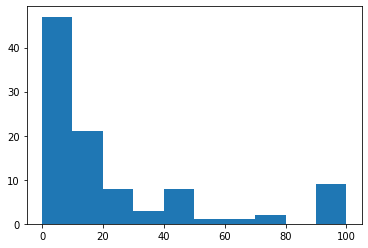

In [180]:
plt.hist(x = 'repayCount', data = df)

(array([91.,  2.,  3.,  0.,  0.,  1.,  2.,  0.,  0.,  1.]),
 array([ 0. ,  4.8,  9.6, 14.4, 19.2, 24. , 28.8, 33.6, 38.4, 43.2, 48. ]),
 <a list of 10 Patch objects>)

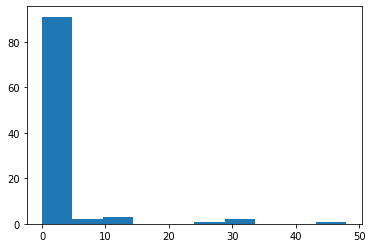

In [181]:
plt.hist(x = 'liquidationCount', data = df)

(array([55., 10., 13.,  3.,  0.,  2.,  1.,  4.,  0., 12.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

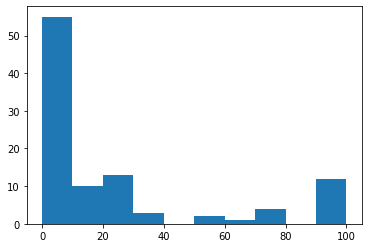

In [182]:
plt.hist(x = 'redeemCount', data = df)

(array([77.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 23.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

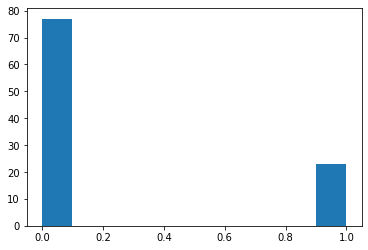

In [183]:
plt.hist(x = 'liquidationstatus', data = df)

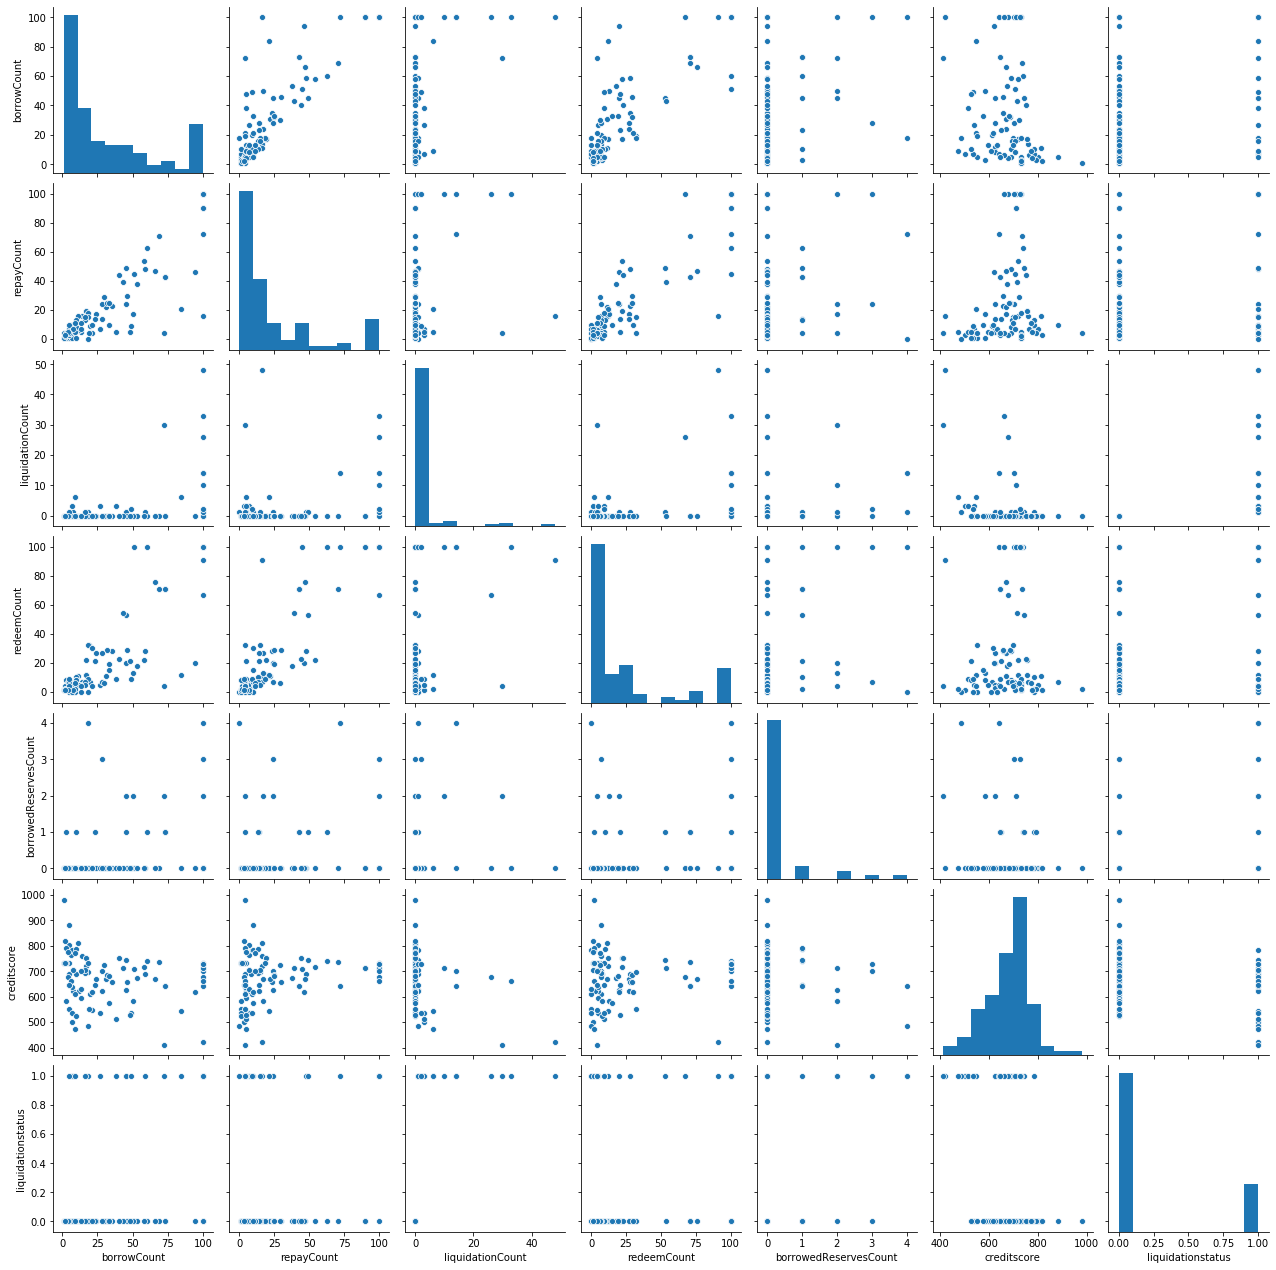

In [184]:
sns.pairplot(df)

There seems to be a high linear correlation between borrowCount and repaycount and redeemCount. Credit score seems to be follow a normal distribution which is what we expected.

We are going to build a linear regression model, using various factors of a user's information to model the number of times the user will encounter a liquidation call. We are going to use multiple linear regression since there seems to be more than one explanatory variable as it seems that the liquidation count is highly correlated with borrowCount, repayCount, and redeemCount.

In [284]:
X =  df[["creditscore","redeemCount"]]
X = sm.add_constant(X)

In [285]:
X

,const,creditscore,redeemCount
0,1.0,762.541972,7
1,1.0,500.000000,1
2,1.0,643.145098,71
3,1.0,731.058579,1
4,1.0,731.058579,6
...,...,...,...
95,1.0,699.759702,4
96,1.0,727.108216,100
97,1.0,616.847909,30
98,1.0,680.827173,19


In [286]:
y = df['liquidationCount']

In [287]:
y

0     0
1     3
2     0
3     0
4     0
     ..
95    0
96    2
97    0
98    0
99    0
Name: liquidationCount, Length: 100, dtype: int64

In [288]:
import statsmodels.api as sm 
from statsmodels.graphics.api import abline_plot
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing 



In [289]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [290]:
rModel = sm.OLS(y_train,X_train)

In [291]:
rModel_results = rModel.fit()


In [292]:
rModel_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       liquidationCount   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     14.24
Date:                Thu, 15 Jul 2021   Prob (F-statistic):           6.14e-06
Time:                        10:36:10   Log-Likelihood:                -251.07
No. Observations:                  75   AIC:                             508.1
Df Residuals:                      72   BIC:                             515.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          21.2658      5.611      3.790      0.000      10.081      32.450
creditscore    -0.0313      0.008     -3.819      0.000      -0.048      -0.015
redeemCount     0.0893      0.024      3.792      0.000       0.042       0.136
==============================================================================
Omnibus:                       57.150   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              241.449
Skew:                           2.409   Prob(JB):                     3.72e-53
Kurtosis:                      10.352   Cond. No.                     4.71e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [293]:
y_pred = rModel_results.predict(X_test)

Text(0, 0.5, 'Actual Values')

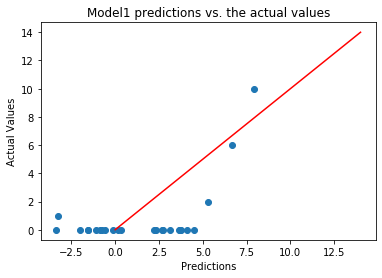

In [294]:
plt.scatter(y_pred,y_test)

# Add a line for perfect correlation
plt.plot([x for x in range(0,15)],[x for x in range(0,15)], color='red')

# Label it nicely
plt.title("Model1 predictions vs. the actual values")
plt.xlabel("Predictions")
plt.ylabel("Actual Values")

In [295]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [296]:
y_pred = rModel_results.predict(X_test)

# Put the predictions & actual values into a dataframe
matches = pd.DataFrame(y_test)
matches.rename(columns = {'liquidationCount':'actual'}, inplace=True)
matches["predicted"] = y_pred

rmse(matches["actual"], matches["predicted"])

2.6112668671837365

We're going to try to run a multiple linear regression model again without using our devised credit score.

In [297]:
X =  df[["borrowCount","repayCount","redeemCount"]]
X = sm.add_constant(X)

In [298]:
y = df['liquidationCount']

In [299]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [300]:
rModel2 = sm.OLS(y_train,X_train)

In [301]:
rModel2_results = rModel2.fit()

In [302]:
rModel2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       liquidationCount   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     15.51
Date:                Thu, 15 Jul 2021   Prob (F-statistic):           7.40e-08
Time:                        10:36:16   Log-Likelihood:                -244.67
No. Observations:                  75   AIC:                             497.3
Df Residuals:                      71   BIC:                             506.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.9911      1.066     -1.868      0.066      -4.117       0.134
borrowCount     0.2785      0.052      5.406      0.000       0.176       0.381
repayCount     -0.1993      0.059     -3.359      0.001      -0.318      -0.081
redeemCount     0.0060      0.051      0.117      0.907      -0.097       0.109
==============================================================================
Omnibus:                       46.697   Durbin-Watson:                   2.359
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.652
Skew:                           1.915   Prob(JB):                     3.23e-38
Kurtosis:                       9.370   Cond. No.                         104.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [303]:
y_pred = rModel2_results.predict(X_test)

Text(0, 0.5, 'Actual Values')

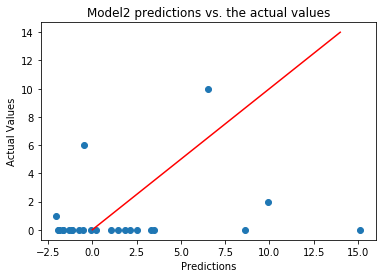

In [304]:
plt.scatter(y_pred,y_test)

# Add a line for perfect correlation
plt.plot([x for x in range(0,15)],[x for x in range(0,15)], color='red')

# Label it nicely
plt.title("Model2 predictions vs. the actual values")
plt.xlabel("Predictions")
plt.ylabel("Actual Values")

In [305]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [306]:
y_pred = rModel2_results.predict(X_test)

# Put the predictions & actual values into a dataframe
matches = pd.DataFrame(y_test)
matches.rename(columns = {'liquidationCount':'actual'}, inplace=True)
matches["predicted"] = y_pred

rmse(matches["actual"], matches["predicted"])

4.43567903029773

The line of fit explain more variability in the second model but the predictions are farther off than what model1 had predicted.

Overall, this would be a much better model if we could only extract borrower's data where they have more than 0 liquidation calls. Most of the data points are centered at 0 making this difficult to model. Overall, on average the prediction of the linear regression model are 2.6 units off from the actual. Also this would a be a much better model if we had more data to work with. Since we are only restricted to 100 addressed the data might be a bit skewed. 